In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
p = 0.55  # probability of winning
q = 1 - p  # probability of losing
b = 2  # odds (2 to 1)

In [3]:
# Kelly fraction
kelly_fraction = (b * p - q) / b
print(f"Win probability: {p}")
print(f"Odds: {b}:1")
print(f"Optimal Kelly fraction: {kelly_fraction:.2%}")

Win probability: 0.55
Odds: 2:1
Optimal Kelly fraction: 32.50%


In [4]:
# Simulation parameters
initial_bankroll = 100
n_bets = 1000
n_simulations = 100

In [5]:
# Different betting strategies
strategies = {
    "Full Kelly": kelly_fraction,
    "Half Kelly": kelly_fraction / 2,
    "Quarter Kelly": kelly_fraction / 4,
    "Fixed 5%": 0.05,
}

In [6]:
# Run simulations
results = {}
for strategy_name, bet_fraction in strategies.items():
    bankrolls = []

    for _ in range(n_simulations):
        bankroll = initial_bankroll
        history = [bankroll]

        for _ in range(n_bets):
            bet_size = bankroll * bet_fraction

            # Simulate bet outcome
            if np.random.random() < p:
                # Win: gain 2x the bet
                bankroll += bet_size * b
            else:
                # Lose: lose the bet
                bankroll -= bet_size

            history.append(bankroll)

        bankrolls.append(history)

    results[strategy_name] = bankrolls

C:\Users\yzdom\AppData\Local\Temp\ipykernel_26752\1376267375.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(final_values.values(), labels=final_values.keys())


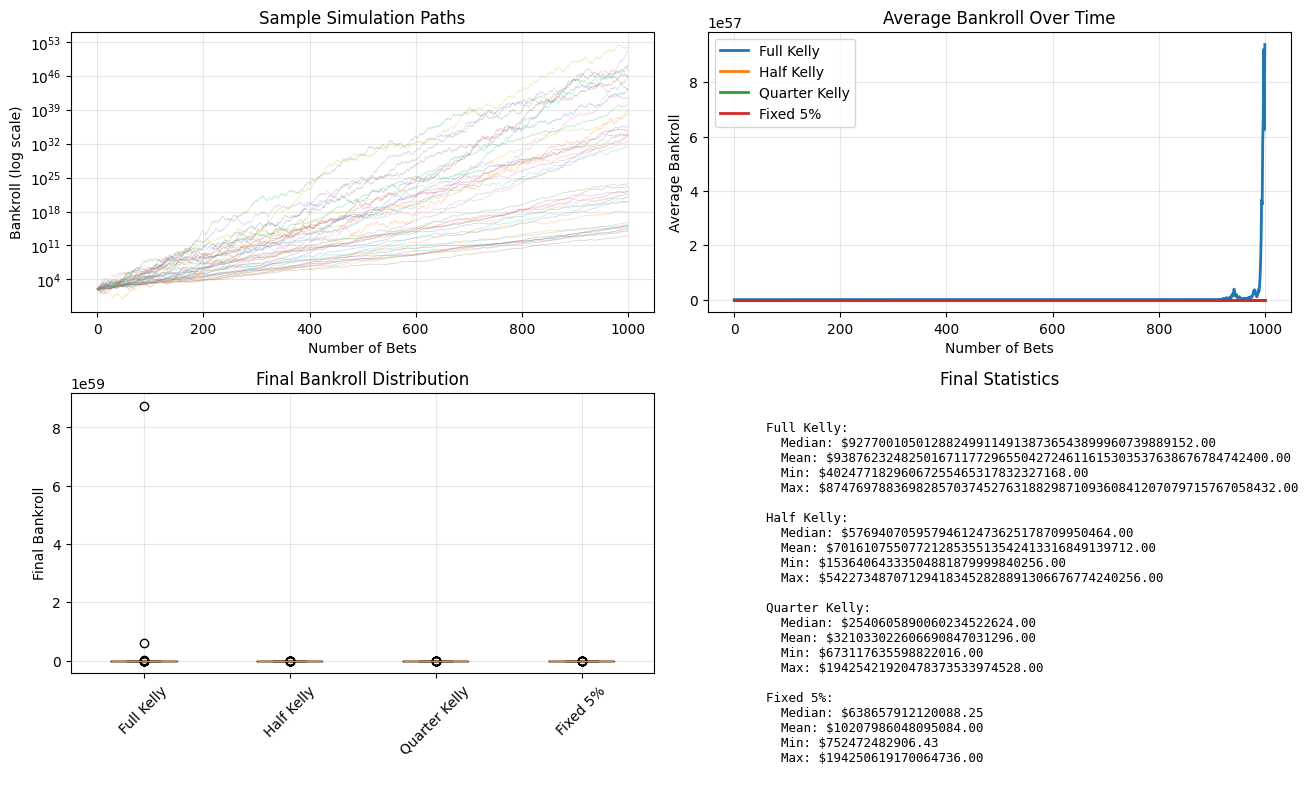

In [7]:
# Plot results
plt.figure(figsize=(14, 8))

# Plot 1: Individual simulation paths
plt.subplot(2, 2, 1)
for strategy_name, bankrolls in results.items():
    for i in range(min(10, n_simulations)):  # Plot first 10 simulations
        plt.plot(bankrolls[i], alpha=0.3, linewidth=0.5)
plt.yscale("log")
plt.xlabel("Number of Bets")
plt.ylabel("Bankroll (log scale)")
plt.title("Sample Simulation Paths")
plt.grid(True, alpha=0.3)

# Plot 2: Average performance
plt.subplot(2, 2, 2)
for strategy_name, bankrolls in results.items():
    avg_bankroll = np.mean(bankrolls, axis=0)
    plt.plot(avg_bankroll, label=strategy_name, linewidth=2)
plt.xlabel("Number of Bets")
plt.ylabel("Average Bankroll")
plt.title("Average Bankroll Over Time")
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Final bankroll distribution
plt.subplot(2, 2, 3)
final_values = {name: [b[-1] for b in bankrolls] for name, bankrolls in results.items()}
plt.boxplot(final_values.values(), labels=final_values.keys())
plt.ylabel("Final Bankroll")
plt.title("Final Bankroll Distribution")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Plot 4: Statistics
plt.subplot(2, 2, 4)
stats_text = []
for strategy_name, bankrolls in results.items():
    final = [b[-1] for b in bankrolls]
    median = np.median(final)
    mean = np.mean(final)
    min_val = np.min(final)
    max_val = np.max(final)

    stats_text.append(f"{strategy_name}:")
    stats_text.append(f"  Median: ${median:.2f}")
    stats_text.append(f"  Mean: ${mean:.2f}")
    stats_text.append(f"  Min: ${min_val:.2f}")
    stats_text.append(f"  Max: ${max_val:.2f}")
    stats_text.append("")

plt.text(
    0.1,
    0.9,
    "\n".join(stats_text),
    transform=plt.gca().transAxes,
    fontfamily="monospace",
    verticalalignment="top",
    fontsize=9,
)
plt.axis("off")
plt.title("Final Statistics")

plt.tight_layout()
plt.show()

In [8]:
# Print summary
print("\n" + "=" * 50)
print("SIMULATION SUMMARY")
print("=" * 50)
for strategy_name, bankrolls in results.items():
    final = [b[-1] for b in bankrolls]
    print(f"\n{strategy_name} ({bet_fraction*100:.1f}% of bankroll):")
    print(f"  Median final: ${np.median(final):.2f}")
    print(f"  Mean final: ${np.mean(final):.2f}")
    print(f"  Bankruptcy rate: {sum(f < 1 for f in final)/len(final):.1%}")


SIMULATION SUMMARY

Full Kelly (5.0% of bankroll):
  Median final: $9277001050128824991149138736543899960739889152.00
  Mean final: $9387623248250167117729655042724611615303537638676784742400.00
  Bankruptcy rate: 0.0%

Half Kelly (5.0% of bankroll):
  Median final: $57694070595794612473625178709950464.00
  Mean final: $7016107550772128535513542413316849139712.00
  Bankruptcy rate: 0.0%

Quarter Kelly (5.0% of bankroll):
  Median final: $2540605890060234522624.00
  Mean final: $321033022606690847031296.00
  Bankruptcy rate: 0.0%

Fixed 5% (5.0% of bankroll):
  Median final: $638657912120088.25
  Mean final: $10207986048095084.00
  Bankruptcy rate: 0.0%
